In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Data description

In [3]:
data = pd.read_csv('../input/titanic/train.csv')
X_test = pd.read_csv('../input/titanic/test.csv')

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
X_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Filling missing Values

In [8]:
data.Age = data.Age.fillna(data.Age.median())
data.Embarked = data.Embarked.fillna(data.Embarked.mode()[0])

In [9]:
X_test.Fare = X_test.Fare.fillna(data.Fare.median())
X_test.Age = X_test.Age.fillna(X_test.Age.median())

In [10]:
data['1st_class'] = (data['Pclass']==1).astype('int')
data['2nd_class'] = (data['Pclass']==2).astype('int')
data['3rd_class'] = (data['Pclass']==3).astype('int')

In [11]:
X_test['1st_class'] = (X_test['Pclass']==1).astype('int')
X_test['2nd_class'] = (X_test['Pclass']==2).astype('int')
X_test['3rd_class'] = (X_test['Pclass']==3).astype('int')

In [12]:
print('\tNaN Train data')
print(data.isnull().sum())
print('___'*30)
print('\tNaN Test data')
print(X_test.isnull().sum())

	NaN Train data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
1st_class        0
2nd_class        0
3rd_class        0
dtype: int64
__________________________________________________________________________________________
	NaN Test data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
1st_class        0
2nd_class        0
3rd_class        0
dtype: int64


In [13]:
drop_fields = ['Cabin', 'Name']

In [14]:
all_data = [data, X_test]

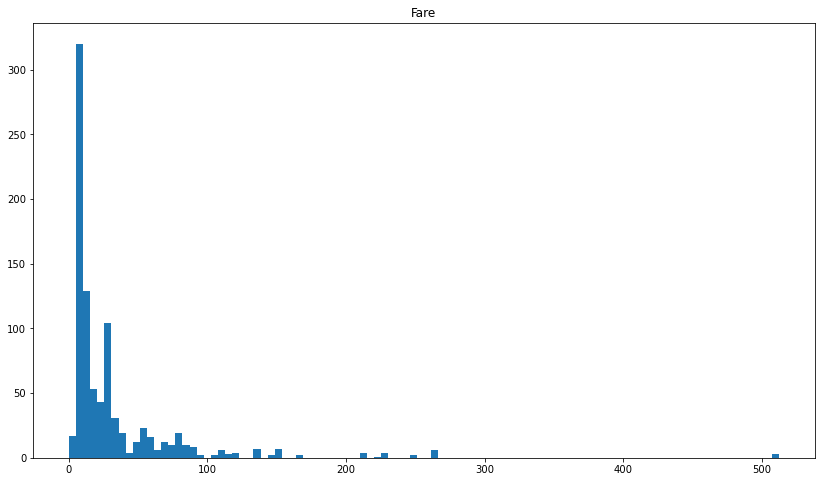

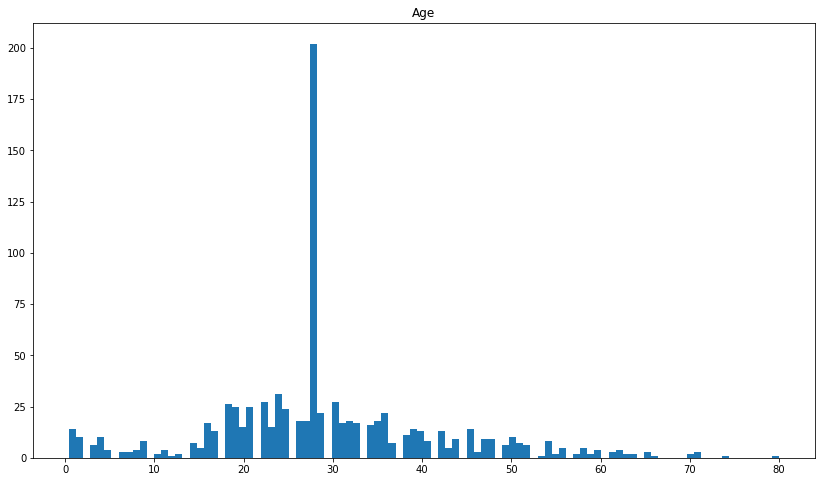

In [15]:
plt.figure(figsize = (14,8))
plt.hist(data.Fare, bins=100)
plt.title("Fare")
plt.show()
plt.figure(figsize = (14,8))
plt.hist(data.Age, bins=100)
plt.title("Age")
plt.show()

In [16]:
for df in all_data:
    df.drop(drop_fields, axis=1, inplace = True)
    df['family_size'] = df['SibSp'] + df['Parch'] + 1
    df['age_cut'] = pd.cut(df['Age'], bins=[0,12,21,40,df['Age'].max()], labels=['Children','Teenage','Adult','Elder'])
    
    df['fare_cut'] = pd.cut(df['Fare'], bins=[0,10,20,40,120], labels=['Low','Medium','Average','High'])
    df['Age_Class']= df['Age']* df['Pclass']
    df['Fare_Per_Person'] = df['Fare']/df['family_size']
    df['Fare_Per_Person'] = df['Fare_Per_Person'].astype(int)

In [17]:
drop_columns = ['Age', 'Fare', 'Ticket']
pd_data_train = data.drop(drop_columns, axis=1)
pd_data_test = X_test.drop(drop_columns, axis=1)

In [18]:
pd_data_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,1st_class,2nd_class,3rd_class,family_size,age_cut,fare_cut,Age_Class,Fare_Per_Person
0,1,0,3,male,1,0,S,0,0,1,2,Adult,Low,66.0,3
1,2,1,1,female,1,0,C,1,0,0,2,Adult,High,38.0,35
2,3,1,3,female,0,0,S,0,0,1,1,Adult,Low,78.0,7
3,4,1,1,female,1,0,S,1,0,0,2,Adult,High,35.0,26
4,5,0,3,male,0,0,S,0,0,1,1,Adult,Low,105.0,8


In [19]:
pd_data_train = pd_data_train.drop(['PassengerId'], axis=1)

In [20]:
y_train = pd_data_train['Survived']
pd_data_train = pd.get_dummies(pd_data_train, columns = ["Sex","age_cut","Embarked","fare_cut"],
                                         prefix=["Sex","age_cut","Em_type","Fare_type"])
pd_data_test = pd.get_dummies(pd_data_test, columns = ["Sex","age_cut","Embarked","fare_cut"],
                                         prefix=["Sex","age_cut","Em_type","Fare_type"])

In [21]:
pd_data_train.columns.values

array(['Survived', 'Pclass', 'SibSp', 'Parch', '1st_class', '2nd_class',
       '3rd_class', 'family_size', 'Age_Class', 'Fare_Per_Person',
       'Sex_female', 'Sex_male', 'age_cut_Children', 'age_cut_Teenage',
       'age_cut_Adult', 'age_cut_Elder', 'Em_type_C', 'Em_type_Q',
       'Em_type_S', 'Fare_type_Low', 'Fare_type_Medium',
       'Fare_type_Average', 'Fare_type_High'], dtype=object)

In [22]:
# X_test['1st_class'] = (X_test['Pclass']==1).astype('int')
# X_test['2nd_class'] = (X_test['Pclass']==2).astype('int')
# X_test['3rd_class'] = (X_test['Pclass']==3).astype('int')
# X_test.Age = X_test.Age.fillna(X_test.Age.median())
# X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())
# X_test = pd.concat([X_test, pd.get_dummies(X_test[['Embarked', 'Sex', 'Pclass']])],  axis=1)
# X_test = X_test.drop(['Cabin', 'Embarked', 'Sex', 'Name', 'Ticket', 'Pclass', 'PassengerId'], axis=1)

### correletion between the Features

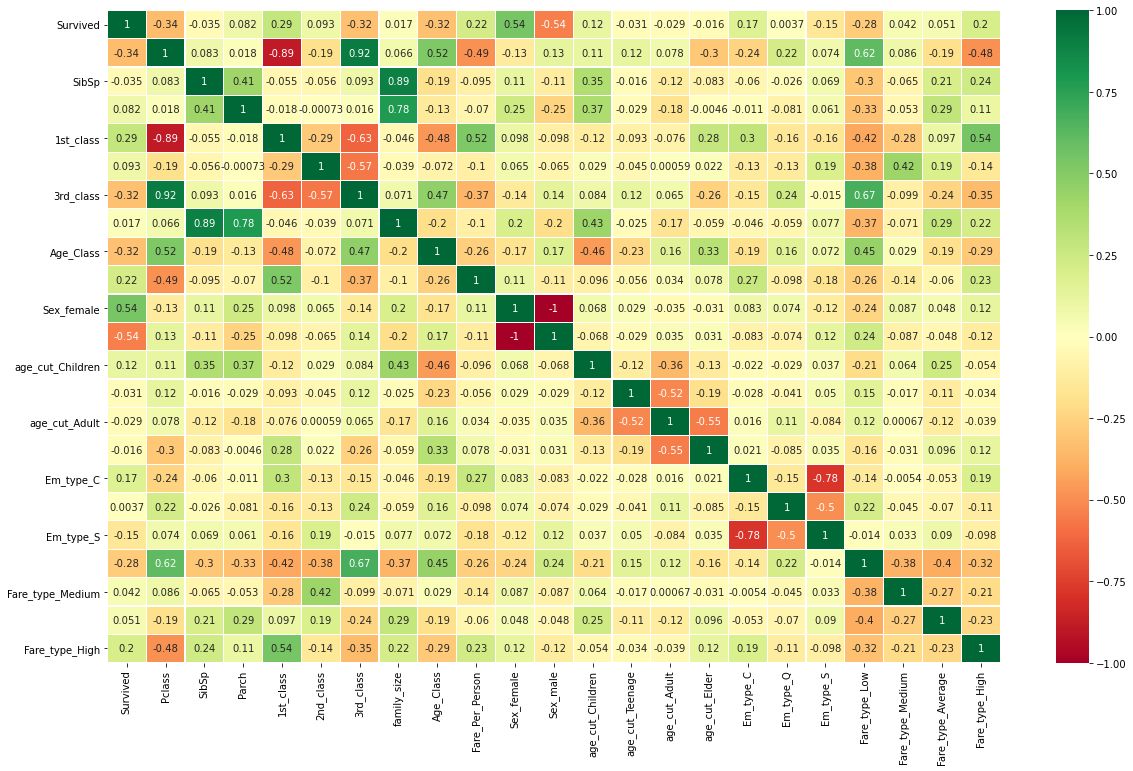

In [23]:
sns.heatmap(pd_data_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

# Common models

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [25]:
all_features = pd_data_train.drop("Survived",axis=1)

In [26]:
X_train = all_features.copy()
X_test = pd_data_test.drop('PassengerId', axis=1).copy()

## Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [29]:
scaled_features = scaler.transform(X_train)
test_scaled_features = scaler.transform(X_test)

In [30]:
train_feat = pd.DataFrame(scaled_features, columns = X_train.columns)
test_feat = pd.DataFrame(test_scaled_features, columns = X_test.columns)

In [31]:
train_feat.isna().sum()

Pclass               0
SibSp                0
Parch                0
1st_class            0
2nd_class            0
3rd_class            0
family_size          0
Age_Class            0
Fare_Per_Person      0
Sex_female           0
Sex_male             0
age_cut_Children     0
age_cut_Teenage      0
age_cut_Adult        0
age_cut_Elder        0
Em_type_C            0
Em_type_Q            0
Em_type_S            0
Fare_type_Low        0
Fare_type_Medium     0
Fare_type_Average    0
Fare_type_High       0
dtype: int64

In [32]:
models = []
models.append(('LR', LogisticRegression())) # alpha
models.append(('SVC', SVC())) # C
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('MNB', GaussianNB()))
models.append(('SGD', SGDClassifier()))
models.append(('RFC', RandomForestClassifier(criterion='gini', n_estimators=700,
                                             min_samples_split=10,min_samples_leaf=1,
                                             max_features='auto',oob_score=True,
                                             random_state=1,n_jobs=-1)))
models.append(('GBC', GradientBoostingClassifier()))

In [33]:
results_e2 = []
names_e2 = []

for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10)
    if name == 'MNB':
        cv_results = cross_val_score(model, all_features, y_train, cv=kfold, scoring='accuracy')
    else:
        # train the model
        cv_results = cross_val_score(model, all_features, y_train, cv=kfold, scoring='accuracy')
    results_e2.append(cv_results)
    names_e2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.799089 (0.039450)
SVC: 0.701598 (0.061227)
KNN: 0.715006 (0.040171)
MNB: 0.770025 (0.054713)
SGD: 0.738477 (0.089943)
RFC: 0.829451 (0.037609)
GBC: 0.819326 (0.035562)


# SVC

In [34]:
train_feat.head()

,Pclass,SibSp,Parch,1st_class,2nd_class,3rd_class,family_size,Age_Class,Fare_Per_Person,Sex_female,...,age_cut_Teenage,age_cut_Adult,age_cut_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low,Fare_type_Medium,Fare_type_Average,Fare_type_High
0,0.827377,0.432793,-0.473674,-0.565685,-0.510152,0.902587,0.059160,0.058824,-0.459218,-0.737695,...,-0.422577,0.811922,-0.449921,-0.482043,-0.307562,0.615838,1.332554,-0.501403,-0.537992,-0.428097
1,-1.566107,0.432793,-0.473674,1.767767,-0.510152,-1.107926,0.059160,-0.803342,0.434090,1.355574,...,-0.422577,0.811922,-0.449921,2.074505,-0.307562,-1.623803,-0.750438,-0.501403,-0.537992,2.335920
2,0.827377,-0.474545,-0.473674,-0.565685,-0.510152,0.902587,-0.560975,0.428324,-0.347554,1.355574,...,-0.422577,0.811922,-0.449921,-0.482043,-0.307562,0.615838,1.332554,-0.501403,-0.537992,-0.428097
3,-1.566107,0.432793,-0.473674,1.767767,-0.510152,-1.107926,0.059160,-0.895717,0.182847,1.355574,...,-0.422577,0.811922,-0.449921,-0.482043,-0.307562,0.615838,-0.750438,-0.501403,-0.537992,2.335920
4,0.827377,-0.474545,-0.473674,-0.565685,-0.510152,0.902587,-0.560975,1.259699,-0.319638,-0.737695,...,-0.422577,0.811922,-0.449921,-0.482043,-0.307562,0.615838,1.332554,-0.501403,-0.537992,-0.428097


In [35]:
from sklearn.model_selection import train_test_split

X_train_svc, X_val_svc, y_train_svc, y_val_svc = train_test_split(
    train_feat.copy(), 
    y_train, 
    test_size=0.25, 
    shuffle=True)

parameters = {'gamma': ['scaled', 1, 0.1, 0.01, 0.001],'kernel': ['rbf', 'poly', 'sigmoid'], 'C':[0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
svc_model = SVC(gamma='scale')
model_svc = GridSearchCV(svc_model, parameters)
model_svc.fit(train_feat, y_train)
print(model_svc.best_score_)


0.8327474734793799


In [36]:
model_svc.best_params_

{'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}

In [37]:
clf_svc = SVC(**model_svc.best_params_)
clf_svc.fit(train_feat, y_train)
predicts = clf_svc.predict(test_feat)
svc_predicts = pd.DataFrame({'PassengerId':range(892,len(X_test)+892), 'Survived':predicts})
svc_predicts

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## RandomForestClassifier

In [38]:
# Random Forest Classifier Parameters tunning 
model = RandomForestClassifier()
n_estim=range(100,1000,100)

## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(X_train,y_train)

Y_pred_rf = model_rf.predict(X_test)

# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


0.8069926558282594


[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   16.1s finished


{'n_estimators': 100}

In [39]:
print(range(892,len(X_test)+892))

range(892, 1310)


In [40]:
Y_pred_rf = pd.DataFrame({'PassengerId':range(892,len(X_test)+892), 'Survived':Y_pred_rf})
Y_pred_rf

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


# boosting

## XGBoost

Feature Importances :  [0.27487198 0.03948373 0.01121934 0.         0.02192553 0.
 0.04987184 0.0200829  0.01703595 0.243701   0.         0.12486745
 0.02408148 0.02295118 0.00599096 0.02242735 0.01558544 0.02197783
 0.01495984 0.02659401 0.0285204  0.01385188]


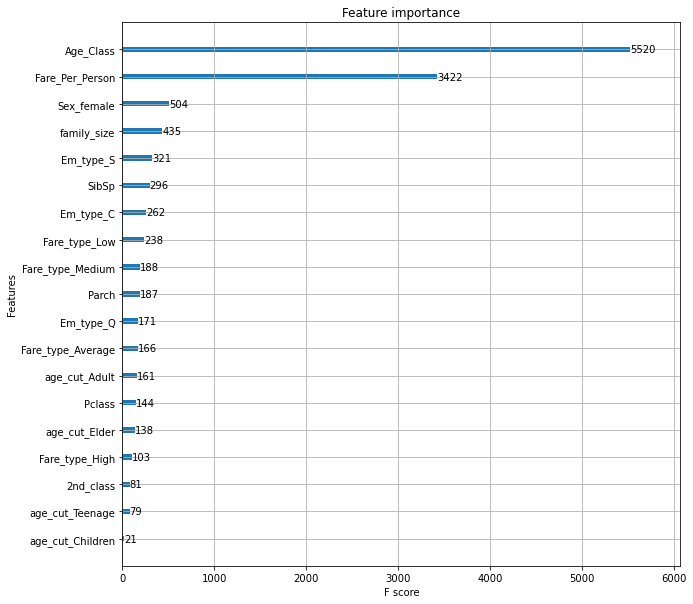

In [41]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

xgb_model = XGBClassifier(n_estimators=1000)
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(xgb_model)
plt.show()

In [42]:
cv_results = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % ('xgboost', cv_results.mean(), cv_results.std())
print(msg)

xgboost: 0.812597 (0.025908)


## Regression

Feature Importances :  [0.12145542 0.02572702 0.01180976 0.         0.02152698 0.
 0.07185844 0.02998009 0.0302783  0.22345944 0.         0.18694821
 0.05140438 0.02294909 0.00866101 0.01360032 0.01691227 0.0570779
 0.01956396 0.04206049 0.02129863 0.02342832]


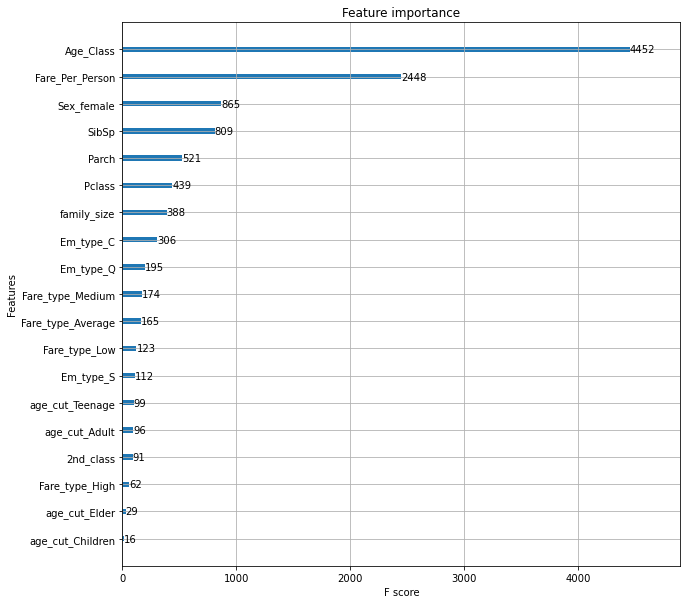

In [43]:
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt

xgb_model = XGBRegressor(n_estimators=1000)
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(xgb_model)
plt.show()

In [44]:
cv_results = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
msg = "%s: %f (%f)" % ('xgboost', cv_results.mean(), cv_results.std())
print(msg)

xgboost: -0.165347 (0.024023)


In [45]:
xgb_model = XGBRegressor(n_estimators=1000)
xgb_model.fit(X_train, y_train)
predicts = list(map(int, xgb_model.predict(X_train) > 0.5))
(predicts == y_train).mean()

0.9618406285072951

In [46]:
xgb_model = XGBRegressor(n_estimators=1000)
xgb_model.fit(X_train, y_train)
predicts = map(int, xgb_model.predict(X_test) > 0.5)
xgb_reg_sub = pd.DataFrame({'PassengerId':range(892,len(X_test)+892), 'Survived':predicts})

In [47]:
xgb_reg_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


# neural network

In [48]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [49]:
from sklearn.model_selection import train_test_split

X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(
    X_train.copy(), 
    y_train, 
    test_size=0.15, 
    shuffle=True)

X_train_n = torch.FloatTensor(X_train_n.values.astype(np.float32))
X_val_n = torch.FloatTensor(X_val_n.values.astype(np.float32))
y_train_n = torch.FloatTensor(y_train_n.values.astype(np.float32))
y_val_n = torch.FloatTensor(y_val_n.values.astype(np.float32))

In [50]:
class TitanicNet(torch.nn.Module):
    def __init__(self, num_features, n_hidden_neurons):
        super(TitanicNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(num_features, num_features//2)
        self.activ1 = torch.nn.ReLU()
        self.batchnorm1 = torch.nn.BatchNorm1d(num_features//2)
        
        self.fc2 = torch.nn.Linear(num_features//2, n_hidden_neurons)
        self.activ2 = torch.nn.ReLU()
        self.batchnorm2 = torch.nn.BatchNorm1d(n_hidden_neurons)
        self.dropout = torch.nn.Dropout(p=0.5)
        
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ3 = torch.nn.ReLU()
        self.batchnorm3 = torch.nn.BatchNorm1d(n_hidden_neurons)
        self.dropout = torch.nn.Dropout(p=0.5)
        
        self.fc4 = torch.nn.Linear(n_hidden_neurons, 1)
        self.sm = torch.nn.Softmax(dim=1)
        
    # нет софтмакса потому что CE можно посчитать и без софтмакса, а для вероятностей он нужен
    # софтмакс долгая для вычисления функция, поэтому если можем то не считаем
    def forward(self, x):
        x = self.activ1(self.fc1(x))
        x = self.batchnorm1(x)

        x = self.activ2(self.fc2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        
        x = self.activ3(self.fc3(x))
        x = self.batchnorm3(x)
        x = self.dropout(x)
        
        x = self.fc4(x)
        return x

    def inference(self, x):
        x = self.forward(x)
#         x = self.sm(x)
        return x
    
titanicnet = TitanicNet(X_train_n.shape[1], 16)

In [51]:
# loss = torch.nn.BCELoss()
loss = torch.nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(titanicnet.parameters(), 
                             lr=1.0e-3,
                             weight_decay=1e-5)

In [52]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = ('cpu')

In [53]:
def train(X_train_n, X_val_n, y_train_n, y_val_n, batch_size, patience, loss, optimizer):
    last_loss = 100
    for epoch in range(5000):
        order = np.random.permutation(len(X_train_n))
        for start_index in range(0, len(X_train_n), batch_size):
            optimizer.zero_grad()

            batch_indexes = order[start_index:start_index+batch_size]

            x_batch = X_train_n[batch_indexes].to(device)
            y_batch = y_train_n[batch_indexes].to(device)

            preds = titanicnet.forward(x_batch).squeeze(1).sigmoid()
    #         preds = preds.argmax(dim=1)
    #         print(preds)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()
            
            if loss_value > last_loss:
                trigger_times += 1

                if trigger_times >= patience:
                    print('Early stopping!\nStart to test process.')
                    return model

            else:
                trigger_times = 0

            last_loss = loss_value

        if epoch % 100 == 0:
            test_preds = titanicnet.forward(X_val_n)
            test_preds = (test_preds.sigmoid() > 0.5).squeeze(1)

            train_preds = titanicnet.forward(X_train_n)
            train_preds = (train_preds.sigmoid() > 0.5).squeeze(1)
            print('epoch:', epoch)
            print('loss:', loss_value)
            print('train:', (train_preds == y_train_n).float().mean())
            print('test:', (test_preds == y_val_n).float().mean())
            print()

In [54]:
# batch_size = 100
# patience = 100
# titanicnet = titanicnet.to(device)
# X_val_n = X_val_n.to(device)
# y_val_n = y_val_n.to(device)

# train(X_train_n, 
#       X_val_n, 
#       y_train_n, 
#       y_val_n, 
#       batch_size, 
#       patience, 
#       loss, 
#       optimizer)

## RFC

Important features
train acc: 89.9
RFC: 0.829463 (0.037856)


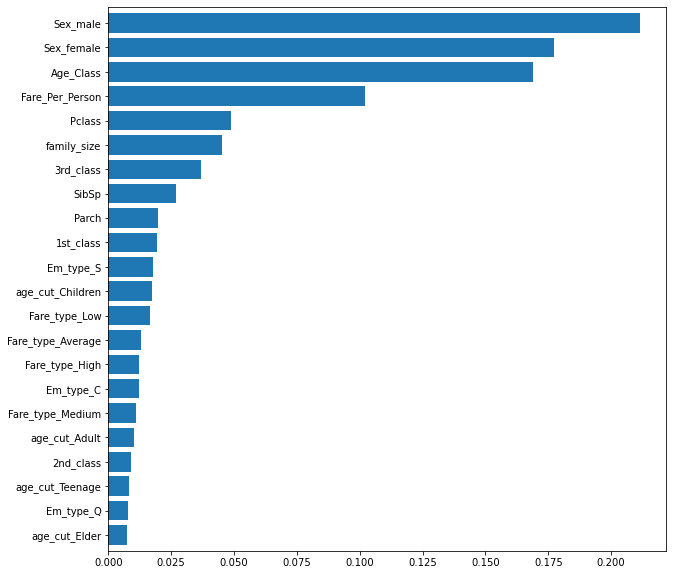

In [55]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=400, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_train)
random_forest.score(X_train,y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('train acc:', acc_random_forest)
cv_results = cross_val_score(random_forest, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % ('RFC', cv_results.mean(), cv_results.std())
print(msg)

# test

In [56]:
X_test_n = torch.FloatTensor(X_test.fillna(0).values.astype(np.float32))
test_preds = titanicnet.forward(X_test_n)

test_preds = (test_preds.sigmoid() > 0.5).squeeze(1).int()

In [57]:
res_nn = pd.DataFrame(zip(range(892,len(X_test)+892), test_preds.numpy()), columns=['PassengerId', 'Survived'])

In [58]:
svc_predicts.to_csv('submission.csv', index=False)
# Y_pred_rf.to_csv('submission.csv', index=False)